##### Netflix Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px

In [2]:
df = pd.read_csv("../data/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We see that columns "directors, cast, country, date_added, rating" consists of multiple values. Specifically, the first three of the mentioned columns contains a huge number of NULL values and these columns are categorical so we will just populate a relevant information in the NULL rows of these columns.

In [6]:
df['director']=df['director'].fillna(value='No Director')
df['cast']=df['cast'].fillna(value='No Cast')
df['country']=df['country'].fillna(value='No Country')

In [7]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

All the NULL values from columns "directors, cast, country" are handled. As columns "date_added and rating" contains a small number of NULL values, it seems fair to drop these few rows and work on analysis of the rest of the data.

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

All NULL values have been handled now.

#### Now let's check if there is scope of cleaning any columns here.

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Let's work on the date columns.

In [11]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month

C:\Users\SQ-PC\AppData\Local\Temp\ipykernel_11396\1378457436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_added"] = pd.to_datetime(df['date_added'])


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,2021,9
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,2021,9
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,2021,9
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,No Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,2021,9
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,2021,9


Text(0.5, 1.0, 'Type')

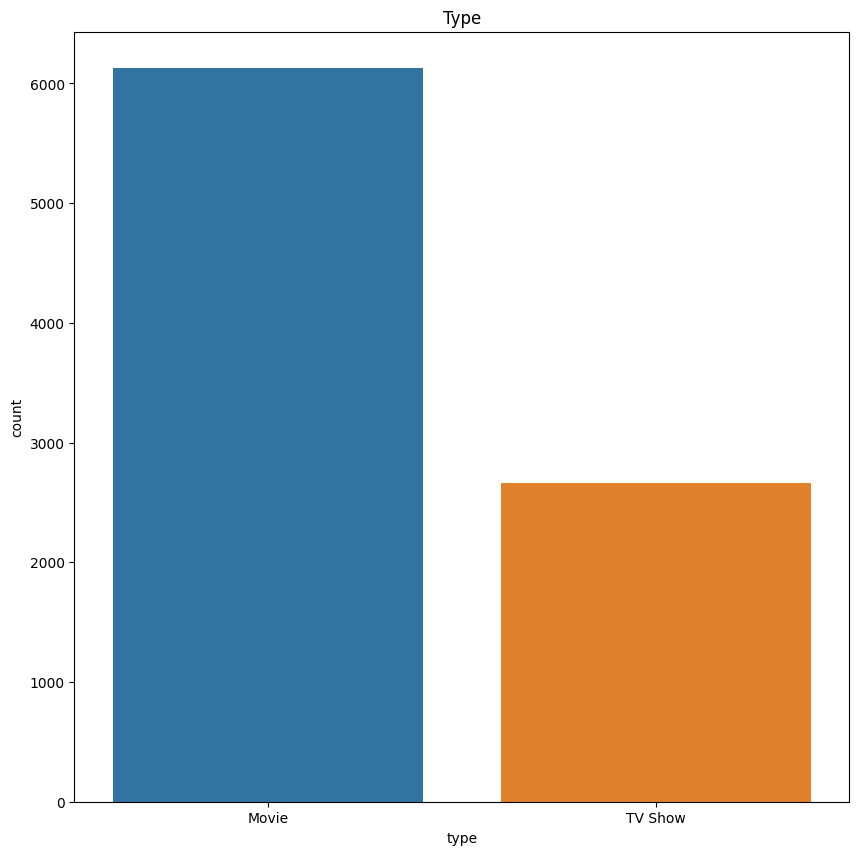

In [13]:
sns.countplot(x=df['type'])
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.title('Type')

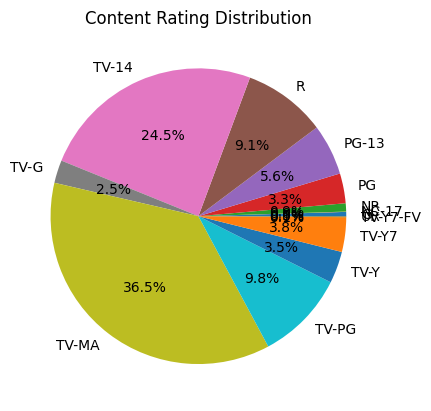

In [16]:
grp = df.groupby(['rating']).size().reset_index(name='counts')

plt.pie(grp['counts'], labels=grp['rating'], autopct='%1.1f%%')
plt.title('Content Rating Distribution')
plt.show()

Text(0.5, 1.0, 'Rating')

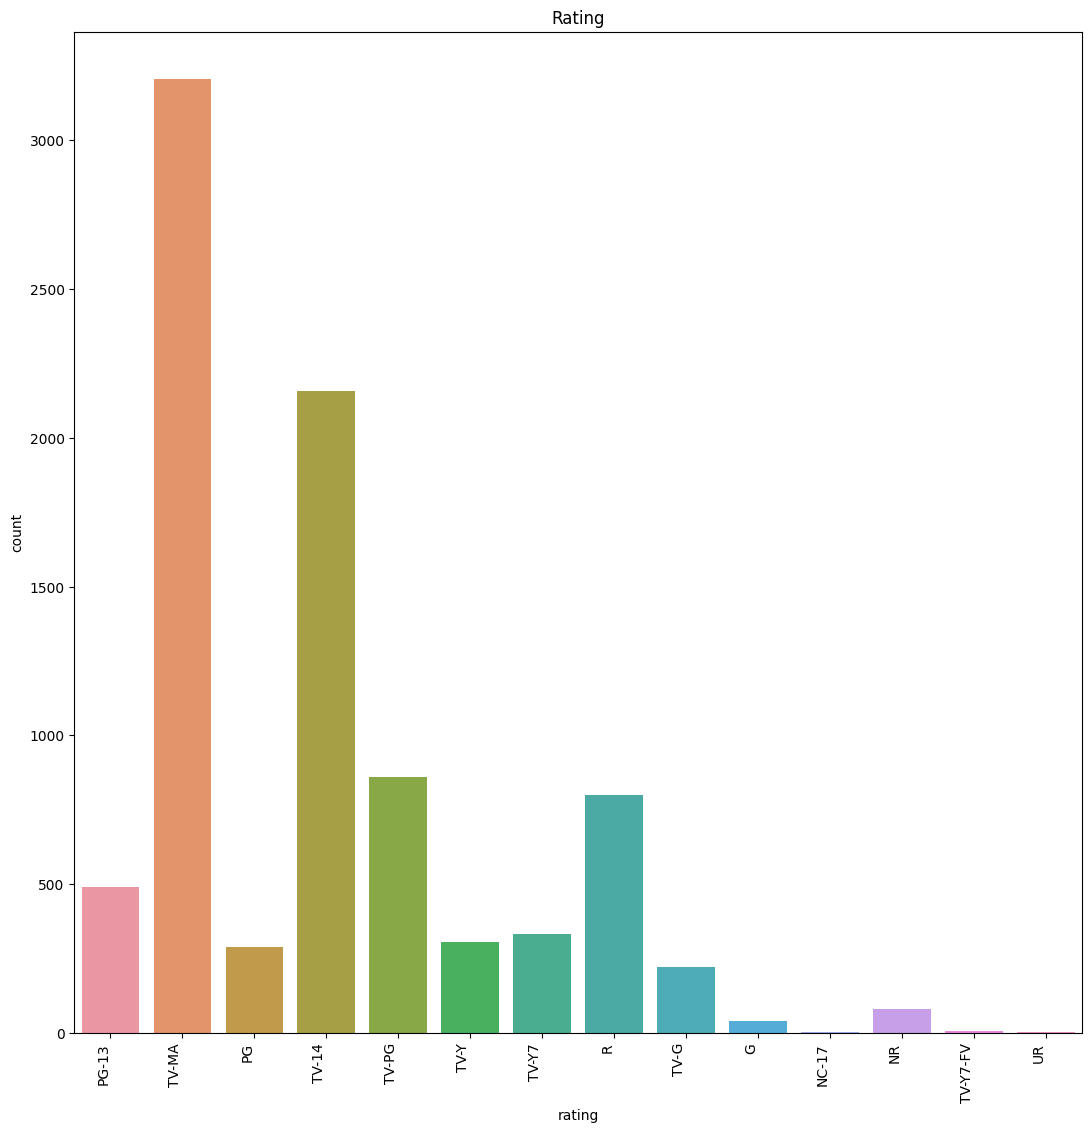

In [17]:
sns.countplot(x=df['rating'])
sns.countplot(x=df['rating']).set_xticklabels(sns.countplot(x=df['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Rating')

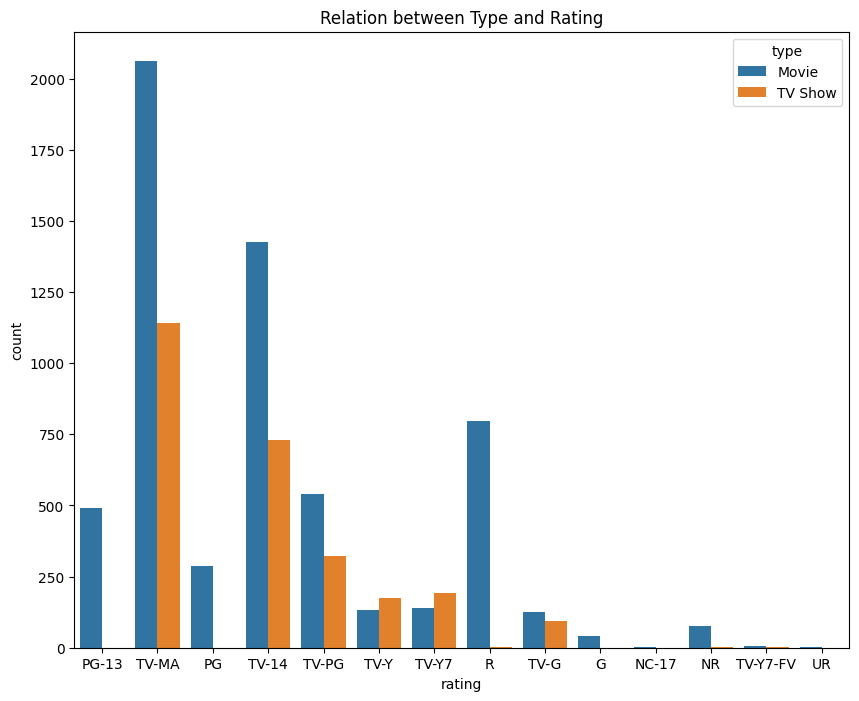

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Relation between Type and Rating')
plt.show()

In [19]:
dirs=pd.DataFrame()
dirs=df['director'].str.split(',',expand=True).stack()
dirs=dirs.to_frame()
dirs.columns=['Director']

dirs1=dirs.groupby(['Director']).size().reset_index(name='Total Content')
dirs1=dirs1[dirs1.Director !='No Director']
dirs1=dirs1.sort_values(by=['Total Content'],ascending=False)

TopFiveDirs=dirs1.head()
TopFiveDirs=TopFiveDirs.sort_values(by=['Total Content'])

fig1=px.bar(TopFiveDirs,x='Total Content',y='Director',title='Top Five Directors')
fig1.show()

In [20]:
cast=pd.DataFrame()
cast=df['cast'].str.split(',',expand=True).stack()
cast=cast.to_frame()
cast.columns=['Actor']

actors=cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast']
actors=actors.sort_values(by=['Total Content'],ascending=False)

TopFiveActors=actors.head()
TopFiveActors=TopFiveActors.sort_values(by=['Total Content'])

fig2=px.bar(TopFiveActors,x='Total Content',y='Actor', title='Top Five Actors')
fig2.show()

In [21]:
df1=df[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2000]

fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Content Trend')
fig3.show()

In [22]:
dfx=df[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})

for index,row in dfx.iterrows():
    desc=row['description']
    testimonial=TextBlob(desc)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Netflix Content Sentiment Analysis")
fig4.show()